In [1]:
import numpy as np
import pickle
import scipy
import matplotlib.pyplot as plt
import os


#  №1

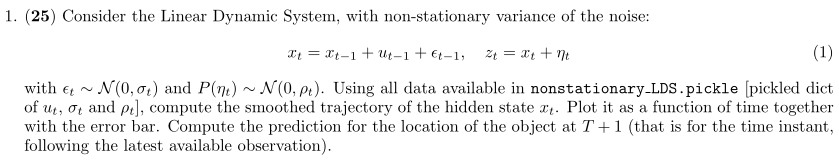

$$ K_t = \frac{\text{err}^2_{t-1} + \sigma_{t-1}^2}{\text{err}^2_{t-1} + \sigma_{t-1}^2 + \rho_{t}^2} $$

$$ \text{err}^2_{t} = \rho^2_t K_t $$

$$\hat x_t = K_tz_t + (1 - K_t)(\hat x_{t-1} + u_{t-1})$$

In [2]:
with open(os.path.join('data/nonstationary_LDS.pickle'), 'rb') as nslds:
    ex1_data = pickle.load(nslds)

u     = ex1_data["u"]
sigma = ex1_data["sigma"]
rho   = ex1_data["rho"]
z     = ex1_data["z"]

T = len(z)
err2 = np.zeros(T)
x_est = np.zeros(T)
K = np.zeros(T)

err2[0] = rho[0]**2
K[0] = 1
x_est[0] = z[0]

In [3]:
for i in range(1, T):
    K[i] = (err2[i-1] + sigma[i-1]**2)/(err2[i-1] + sigma[i-1]**2 + rho[i]**2)
    err2[i] = rho[i]**2 * K[i]
    x_est[i] = K[i] * z[i] + (1 - K[i])*(x_est[i-1] + u[i-1])
    
def show(k):
    plt.figure(figsize = (15, 5))
    plt.plot(np.arange(T)[:k], x_est[:k], label = "Esimated")
    plt.plot(np.arange(T)[:k], z[:k], label = "Observed")
    plt.fill_between(np.arange(T)[:k], x_est[:k]+2*err2[:k]**0.5, x_est[:k]-2*err2[:k]**0.5, alpha=.5, label = "Error bar")
    plt.title(f'estimated trajectory of the hidden state for first {k} steps')
    plt.legend()
    plt.show()

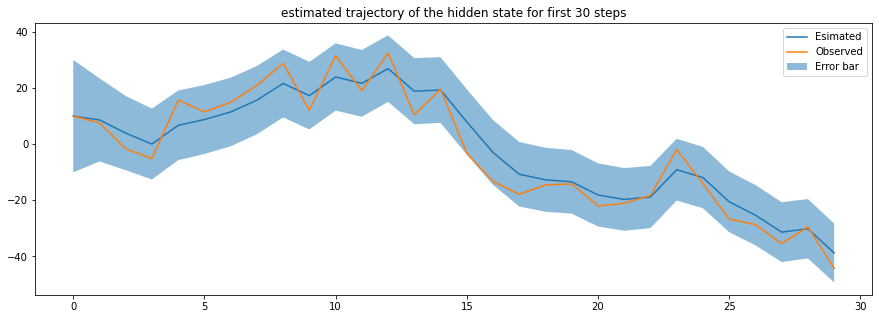

In [4]:
show(30)

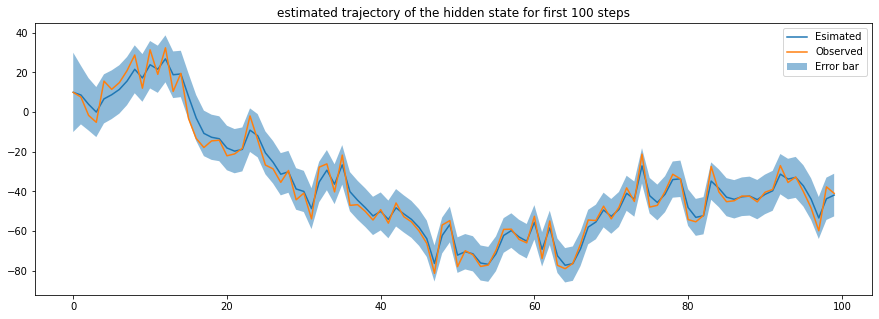

In [5]:
show(100)

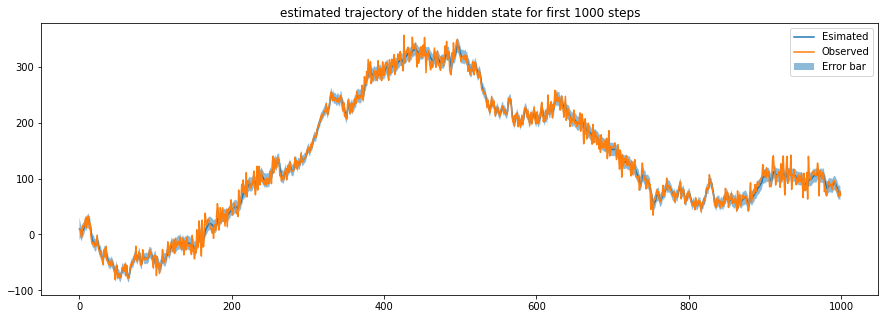

In [6]:
show(1000)

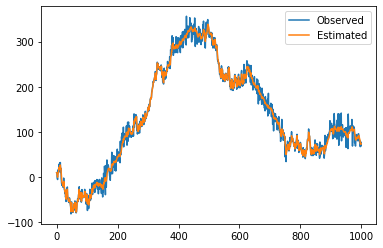

In [7]:
plt.plot(z, label = "Observed")
plt.plot(x_est, label = "Estimated")
plt.legend()
plt.show()

# №2

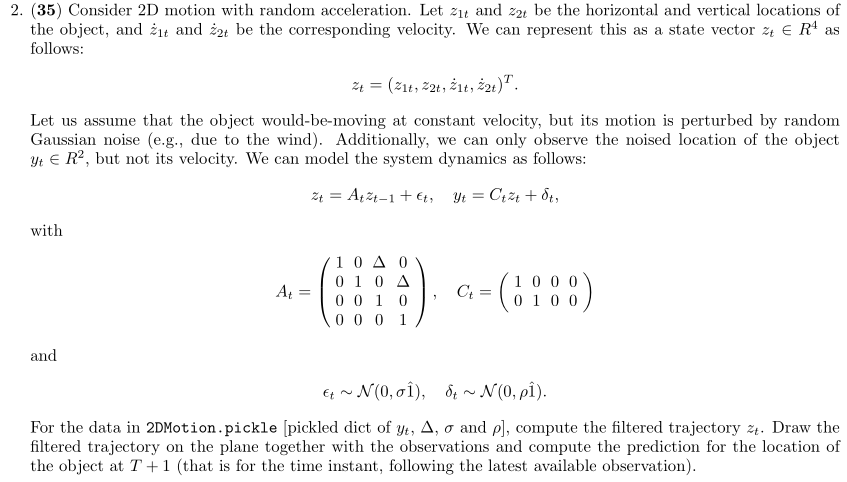

In [8]:
with open(f'data/2DMotion.pickle', 'rb') as motion2d:
        ex2_data = pickle.load(motion2d)

sigma = ex2_data['sigma']
rho   = ex2_data['rho']
Delta = ex2_data['Delta']
y     = np.array(ex2_data['y'])

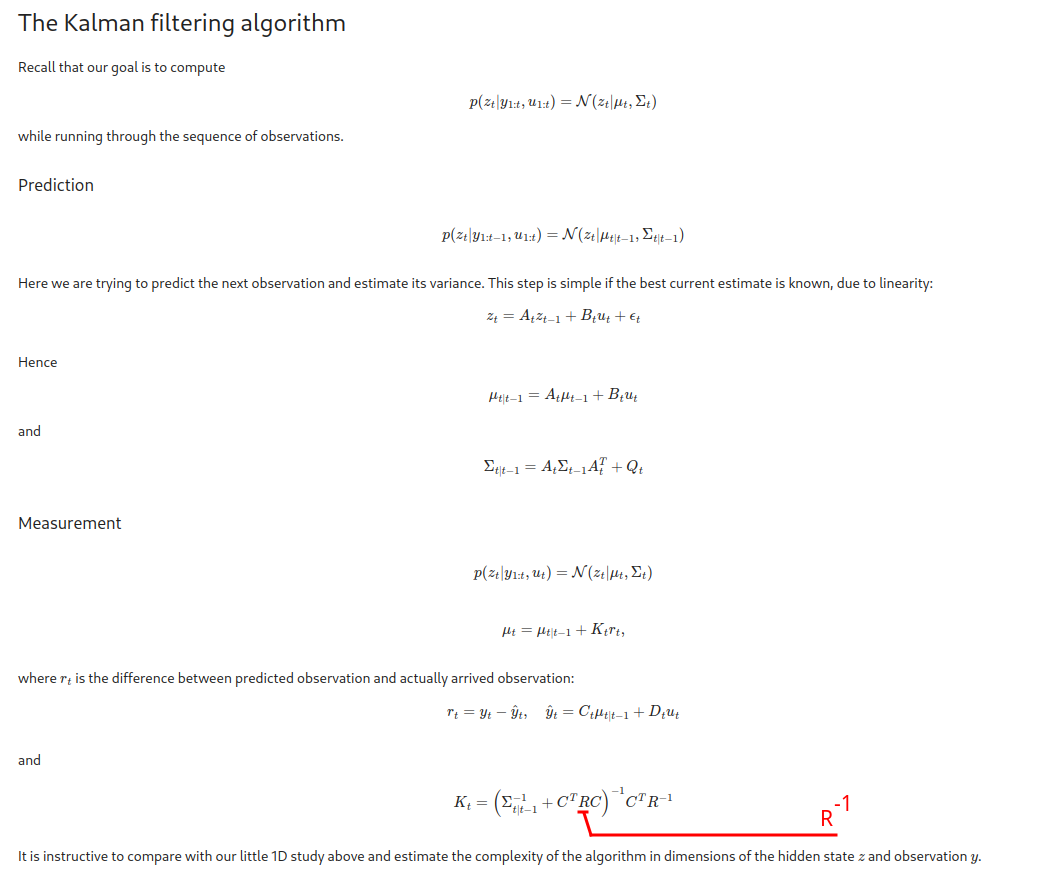

_From: Kevin P Murphy. Machine learning: a probabilistic perspective. MIT press, 2012. Correct in the lecture, typo in the book_

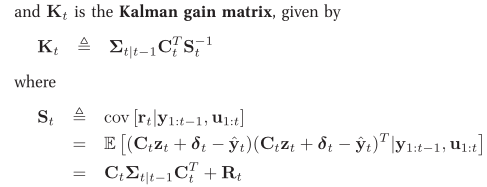

In our notation:
* $ R_t = \rho \hat 1$ measurement noise standard deviation
* $ Q_t = \sigma \hat 1$ motion noise standard deviation
* $ u = 0$ since our motion is in 4D phase space that includes velocity in coordinate

In [9]:
A = np.array([ [ 1, 0, Delta, 0 ], [ 0, 1, 0, Delta ], [ 0, 0, 1, 0 ], [ 0, 0, 0, 1 ] ])
C = np.array([ [ 1, 0, 0, 0 ], [ 0, 1, 0, 0 ] ])

Q = np.diag([ sigma, sigma, sigma, sigma ])
R = np.diag([ rho, rho ])

In [10]:
use_S = False

In [11]:
def pm(mu_prev, Sigma_prev, y, Sigma_override=None, Sigma_inv_override=None):
    mu_temp = A @ mu_prev
    Sigma   = (A @ Sigma_prev @ A.T + Q) if Sigma_override is None else Sigma_override
    
    if use_S:
        S = C @ Sigma @ C.T + R
        K = Sigma @ C.T @ np.linalg.inv(S)
    else:
        temp = np.linalg.inv(Sigma) + C.T @ np.linalg.inv(R) @ C
        temp = np.linalg.inv(temp)
        temp = temp @ C.T
        K    = temp @ np.linalg.inv(R)
    r       = y - C @ mu_temp
    ret     = mu_temp + K @ r
    Sigma_r = (np.identity(4) - K @ C) @ Sigma
    
    return ret, Sigma_r

In [12]:
z = [ [ *y[0], *(y[1] - y[0]) ] ]
Sigma_p = np.diag([ 100_000_000 ] * 4)
z_i, Sigma_p = pm(z[0], None, y[1], Sigma_override=Sigma_p)

In [13]:
while len(z) < len(y):
    z_i, Sigma_p = pm(z[-1], Sigma_p, y[len(z)])
    z.append(z_i)

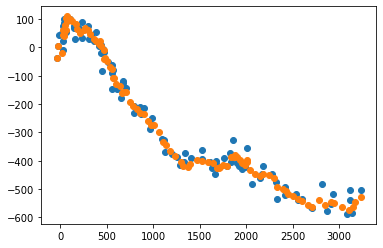

In [14]:
plt.scatter(y[:,0], y[:,1])
z = np.array(z)
plt.scatter(z[:,0], z[:,1])

# №3

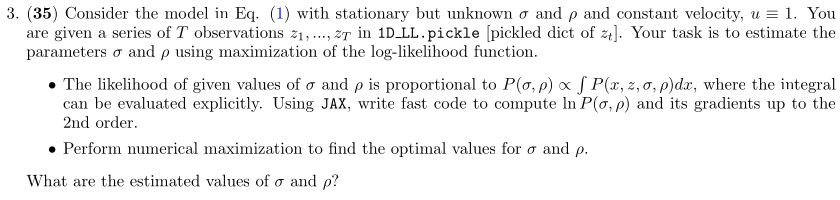

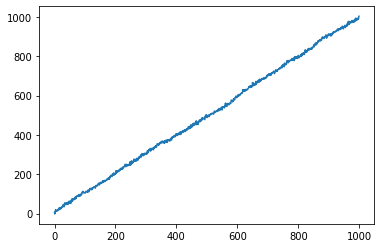

In [15]:
with open(f'data/1D_LL.pickle', 'rb') as motion2d:
    ex3_data = pickle.load(motion2d)
z = ex3_data["z"]
plt.plot(z)